In [1]:
import numpy as np
import pandas as pd

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print(train.shape)
print(test.shape)

(7352, 564)
(2947, 564)


In [4]:
x_train = train.drop(['Subject', 'Activity', 'ActivityName'], axis=1)
y_train = train.ActivityName
x_test = test.drop(['Subject', 'Activity', 'ActivityName'], axis=1)
y_test = test.ActivityName

In [5]:
print('x_train : {}     y_train : {})'.format(x_train.shape, y_train.shape))
print('x_test  : {}     y_test  : {})'.format(x_test.shape, y_test.shape))

x_train : (7352, 561)     y_train : (7352,))
x_test  : (2947, 561)     y_test  : (2947,))


In [6]:
import itertools
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
from datetime import datetime

In [7]:
import warnings
warnings.filterwarnings("ignore")
labels=['Lay','Sit','Stand','Walk','Walk Down','Walk Up']

In [8]:
def perform_model(model, x_train, y_train, x_test, y_test, class_labels, gridsearch=True):
    
    results = dict()  
    
    # training the model
    train_start_time = datetime.now()
    model.fit(x_train, y_train)
    train_end_time = datetime.now()
    train_time =  train_end_time - train_start_time
    print('Training time       - {}'.format(train_time))
    
    
    # predict test data
    test_start_time = datetime.now()
    y_pred = model.predict(x_test)
    test_end_time = datetime.now()
    test_time = test_end_time - test_start_time
    print('Testing time        - {}'.format(test_time))
    
    #validation accuracy and best parameters
    if gridsearch:
        print('Best parameters     - {}'.format(model.best_params_))
        print('Validation accuracy - {}'.format(model.best_score_))

    # calculating test accuracy of the model
    results['accuracy'] = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    print('Test accuracy       - {}'.format(results['accuracy']))
        
    # plot confusin matrix
    c = confusion_matrix(y_test, y_pred)
    ax=sns.heatmap(c, cmap="Blues", annot=True, fmt='d', linecolor='black', linewidth=1)
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks+0.5, labels,rotation=90)
    plt.yticks(tick_marks+0.5, labels,rotation=0)
    plt.title("Confusion Matrix",fontsize=20)
    plt.xlabel('Predicted Class')
    plt.ylabel('Actual Class')
    ax.set_ylim(6.0, 0.0)  # bottom, top = ax.get_ylim()
    plt.show()
    
    return results
    

### Logistic Regression

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  1.5min finished


Training time       - 0:01:36.584382
Testing time        - 0:00:00.203115
Best parameters     - {'C': 30, 'penalty': 'l2'}
Validation accuracy - 0.9458650707290533
Test accuracy       - 0.9630132337970818


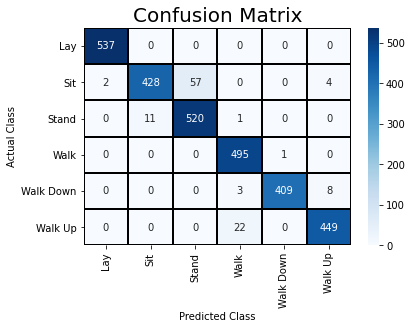

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
parameters = {'C':[0.01, 0.1, 1, 10, 20, 30], 'penalty':['l2','l1']}
log_reg = LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1,n_jobs=-1)
log_reg_grid_results =  perform_model(log_reg_grid, x_train, y_train, x_test, y_test, class_labels=labels)

### Linear SVM

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   40.9s finished


Training time       - 0:00:45.633292
Testing time        - 0:00:00
Best parameters     - {'C': 2}
Validation accuracy - 0.9460010881392819
Test accuracy       - 0.9677638276213099


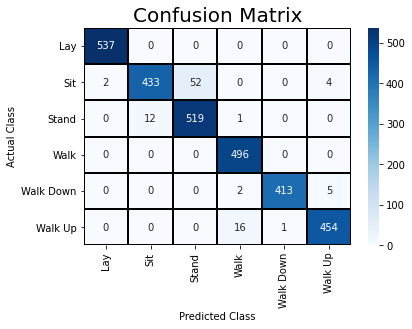

In [10]:
from sklearn.svm import LinearSVC
parameters = {'C':[0.125, 0.25, 0.5, 1, 2, 4, 8, 16]}
lr_svc = LinearSVC()
lr_svc_grid = GridSearchCV(lr_svc, param_grid=parameters,cv=3, n_jobs=-1, verbose=1)
lr_svc_grid_results = perform_model(lr_svc_grid, x_train, y_train, x_test, y_test, class_labels=labels)

### Kernel SVM

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:  3.5min finished


Training time       - 0:03:33.575732
Testing time        - 0:00:02.313587
Best parameters     - {'C': 16, 'gamma': 0.01}
Validation accuracy - 0.9447769314472253
Test accuracy       - 0.9630132337970818


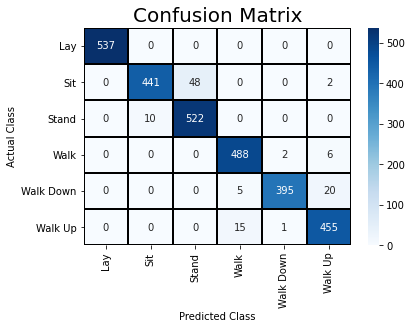

In [11]:
from sklearn.svm import SVC
parameters = {'C':[2,8,16], 'gamma': [ 0.01, 0.1, 1]}
rbf_svm = SVC(kernel='rbf')
rbf_svm_grid = GridSearchCV(rbf_svm, param_grid=parameters,cv=3, n_jobs=-1, verbose=1)
rbf_svm_grid_results = perform_model(rbf_svm_grid, x_train, y_train, x_test, y_test, class_labels=labels)

### Decision Tree

Fitting 3 folds for each of 7 candidates, totalling 21 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:   13.3s finished


Training time       - 0:00:16.198577
Testing time        - 0:00:00.008995
Best parameters     - {'max_depth': 6}
Validation accuracy - 0.8393634385201306
Test accuracy       - 0.8554462164913471


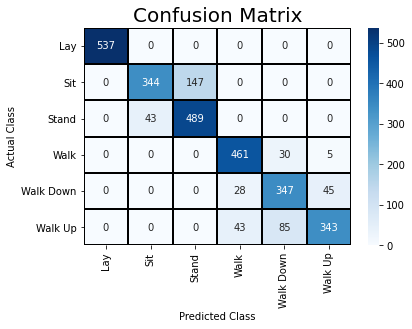

In [13]:
from sklearn.tree import DecisionTreeClassifier
parameters = {'max_depth':[3,4,5,6,7,8,9]} 
dt = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt,param_grid=parameters,cv=3, n_jobs=-1, verbose=1)
dt_grid_results = perform_model(dt_grid, x_train, y_train, x_test, y_test, class_labels=labels)

### Random Forest

Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   41.0s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  6.3min finished


Training time       - 0:06:24.004589
Testing time        - 0:00:00.046859
Best parameters     - {'max_depth': 7, 'n_estimators': 90}
Validation accuracy - 0.9137649619151251
Test accuracy       - 0.9178825924669155


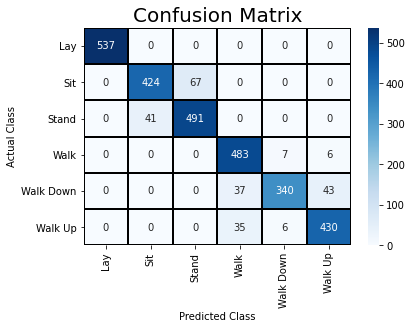

In [14]:
from sklearn.ensemble import RandomForestClassifier
parameters = {'n_estimators': np.arange(10,201,20), 'max_depth':np.arange(3,15,2)}
rfc = RandomForestClassifier()
rfc_grid = GridSearchCV(rfc, param_grid=parameters, cv=3, n_jobs=-1, verbose=1)
rfc_grid_results = perform_model(rfc_grid, x_train, y_train, x_test, y_test, class_labels=labels)

### Gradient Boosting

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed: 57.4min finished


Training time       - 1:03:16.262915
Testing time        - 0:00:00.093759
Best parameters     - {'max_depth': 5, 'n_estimators': 150}
Validation accuracy - 0.9023394994559304
Test accuracy       - 0.9253478113335596


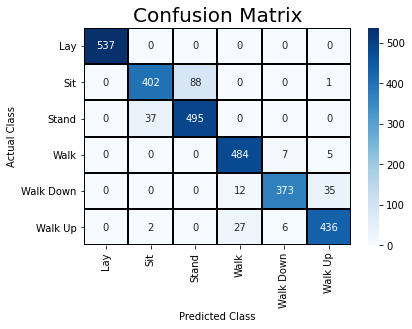

In [15]:
from sklearn.ensemble import GradientBoostingClassifier
parameters = {'max_depth': np.arange(5,8,1), 'n_estimators':np.arange(130,170,10)}
gbdt = GradientBoostingClassifier()
gbdt_grid = GridSearchCV(gbdt, param_grid=parameters, cv=3, n_jobs=-1, verbose=1)
gbdt_grid_results = perform_model(gbdt_grid, x_train, y_train, x_test, y_test, class_labels=labels)

### K Nearest Neighbors

Fitting 3 folds for each of 7 candidates, totalling 21 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:  1.6min finished


Training time       - 0:01:39.274016
Testing time        - 0:00:14.938065
Best parameters     - {'n_neighbors': 17}
Validation accuracy - 0.8954026115342764
Test accuracy       - 0.9070240922972514


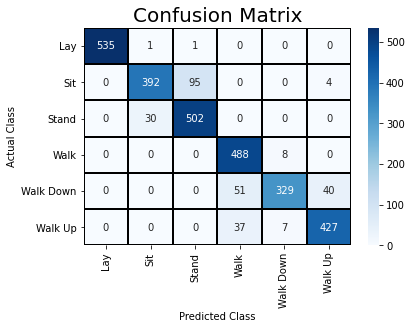

In [16]:
from sklearn.neighbors import KNeighborsClassifier
parameters = {'n_neighbors': [5, 7, 9, 11, 13, 15, 17]}
knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn, param_grid=parameters, cv=3, n_jobs=-1, verbose=1)
knn_grid_results = perform_model(knn_grid, x_train, y_train, x_test, y_test, class_labels=labels)

### Naive Bayes

Training time       - 0:00:00.232743
Testing time        - 0:00:00.209218
Test accuracy       - 0.7702748557855447


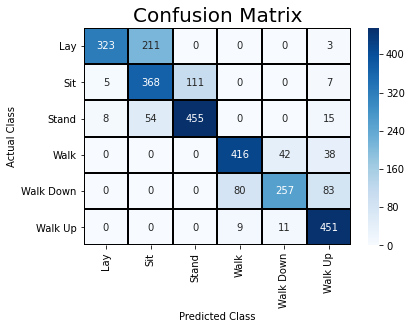

In [17]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb_results = perform_model(nb, x_train, y_train, x_test, y_test, class_labels=labels, gridsearch=False)

### LSTM

In [23]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.core import Dense, Dropout

In [24]:
def load_x(subset):
    signals = ["body_acc_x", "body_acc_y", "body_acc_z", "body_gyro_x", "body_gyro_y", "body_gyro_z", "total_acc_x", "total_acc_y","total_acc_z"]
    signals_data = [] # shape of signals_data will be is (9 signals, 7352 train/2947 test samples, 128 timesteps)
    for signal in signals:
        filename = f'UCI_HAR_Dataset/{subset}/Inertial Signals/{signal}_{subset}.txt'
        data = pd.read_csv(filename, delim_whitespace=True, header=None)
        signals_data.append(data.as_matrix()) 
   
    return np.transpose(signals_data, (1, 2, 0))  # transpose is used to change the dimensionality of the output

In [25]:
def load_y(subset):
    filename = f'UCI_HAR_Dataset/{subset}/y_{subset}.txt'
    y = pd.read_csv(filename, delim_whitespace=True, header=None)
    return pd.get_dummies(y[0]).as_matrix() #converting labels to one-hot encoded vectors

In [26]:
X_train = load_x('train')
X_test  = load_x('test')
Y_train = load_y('train') 
Y_test  = load_y('test')
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(7352, 128, 9)
(2947, 128, 9)
(7352, 6)
(2947, 6)


In [27]:
epochs = 30
batch_size = 16
n_hidden = 32
n_classes = 6
timesteps = len(X_train[0])
input_dim = len(X_train[0][0])

print(timesteps)
print(input_dim)

128
9


In [30]:
#Architecture of LSTM
lstm_model = Sequential()
lstm_model.add(LSTM(n_hidden, input_shape=(timesteps, input_dim)))
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(n_classes, activation='sigmoid'))
lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 32)                5376      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 198       
Total params: 5,574
Trainable params: 5,574
Non-trainable params: 0
_________________________________________________________________


In [31]:
lstm_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
lstm_model.fit(X_train, Y_train, batch_size=batch_size, validation_data=(X_test, Y_test), epochs=epochs)

Epoch 1/30
460/460 [==============================] - 21s 46ms/step - loss: 1.2742 - accuracy: 0.4774 - val_loss: 0.9920 - val_accuracy: 0.5877
Epoch 2/30
460/460 [==============================] - 21s 46ms/step - loss: 0.9019 - accuracy: 0.6017 - val_loss: 0.7829 - val_accuracy: 0.6067
Epoch 3/30
460/460 [==============================] - 22s 48ms/step - loss: 0.7586 - accuracy: 0.6411 - val_loss: 0.7450 - val_accuracy: 0.5986
Epoch 4/30
460/460 [==============================] - 21s 45ms/step - loss: 0.7042 - accuracy: 0.6510 - val_loss: 0.8042 - val_accuracy: 0.6050
Epoch 5/30
460/460 [==============================] - 21s 46ms/step - loss: 0.6506 - accuracy: 0.6749 - val_loss: 0.8253 - val_accuracy: 0.6040
Epoch 6/30
460/460 [==============================] - 21s 45ms/step - loss: 0.6432 - accuracy: 0.6778 - val_loss: 0.6979 - val_accuracy: 0.6800
Epoch 7/30
460/460 [==============================] - 21s 45ms/step - loss: 0.5897 - accuracy: 0.7087 - val_loss: 0.6487 - val_accuracy:

In [34]:
score = lstm_model.evaluate(X_test, Y_test)
lstm_accuracy = score[1]
print("Test accuracy - {}".format(lstm_accuracy))

93/93 [==============================] - 1s 11ms/step - loss: 0.4158 - accuracy: 0.8907
Test accuracy - 0.8907363414764404


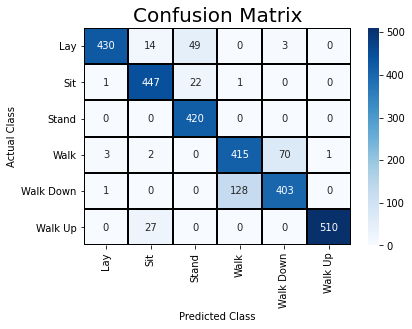

In [37]:
Y_pred = lstm_model.predict(X_test)
c=confusion_matrix(np.argmax(Y_test, axis=1), np.argmax(Y_pred, axis=1))
ax=sns.heatmap(c, cmap="Blues", annot=True, fmt='d', linecolor='black', linewidth=1)
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks+0.5, labels,rotation=90)
plt.yticks(tick_marks+0.5, labels,rotation=0)
plt.title("Confusion Matrix",fontsize=20)
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
ax.set_ylim(6.0, 0.0)
plt.show()

### CNN

In [38]:
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D, MaxPooling1D

In [39]:
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(timesteps, input_dim)))
cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(100, activation='relu'))
cnn_model.add(Dense(n_classes, activation='sigmoid'))
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 126, 64)           1792      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 124, 64)           12352     
_________________________________________________________________
dropout_2 (Dropout)          (None, 124, 64)           0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 62, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 3968)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               396900    
_________________________________________________________________
dense_3 (Dense)              (None, 6)                

In [40]:
cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
cnn_model.fit(X_train, Y_train, batch_size=batch_size, validation_data=(X_test, Y_test), epochs=epochs)

Epoch 1/30
460/460 [==============================] - 7s 16ms/step - loss: 0.3990 - accuracy: 0.8395 - val_loss: 0.3636 - val_accuracy: 0.9013
Epoch 2/30
460/460 [==============================] - 7s 15ms/step - loss: 0.1385 - accuracy: 0.9423 - val_loss: 0.4815 - val_accuracy: 0.8639
Epoch 3/30
460/460 [==============================] - 7s 16ms/step - loss: 0.1126 - accuracy: 0.9524 - val_loss: 0.3447 - val_accuracy: 0.8965
Epoch 4/30
460/460 [==============================] - 7s 16ms/step - loss: 0.1178 - accuracy: 0.9499 - val_loss: 0.3835 - val_accuracy: 0.9074
Epoch 5/30
460/460 [==============================] - 8s 16ms/step - loss: 0.0962 - accuracy: 0.9569 - val_loss: 0.3866 - val_accuracy: 0.9121
Epoch 6/30
460/460 [==============================] - 7s 16ms/step - loss: 0.1175 - accuracy: 0.9517 - val_loss: 0.3273 - val_accuracy: 0.8979
Epoch 7/30
460/460 [==============================] - 7s 16ms/step - loss: 0.0977 - accuracy: 0.9555 - val_loss: 0.4088 - val_accuracy: 0.9046

In [42]:
score = cnn_model.evaluate(X_test, Y_test)
cnn_accuracy = score[1]
print("Test accuracy - {}".format(lstm_accuracy))

93/93 [==============================] - 0s 4ms/step - loss: 0.6717 - accuracy: 0.8941
Test accuracy - 0.8907363414764404


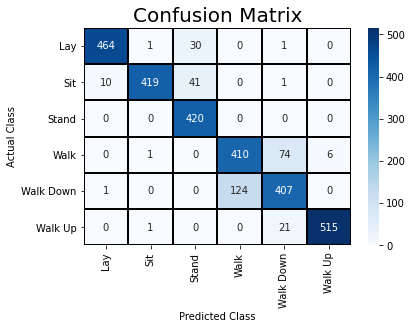

In [43]:
Y_pred = cnn_model.predict(X_test)
c=confusion_matrix(np.argmax(Y_test, axis=1), np.argmax(Y_pred, axis=1))
ax=sns.heatmap(c, cmap="Blues", annot=True, fmt='d', linecolor='black', linewidth=1)
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks+0.5, labels,rotation=90)
plt.yticks(tick_marks+0.5, labels,rotation=0)
plt.title("Confusion Matrix",fontsize=20)
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
ax.set_ylim(6.0, 0.0)
plt.show()

### Comparing all the ML/DL models

In [49]:
print(' MODELS              ACCURACY   ')
print('--------            ----------   ')
print('Logistic Regression : {:.04}% '.format(log_reg_grid_results['accuracy'] * 100))
print('Linear SVM          : {:.04}% '.format(lr_svc_grid_results['accuracy'] * 100))
print('Kernel SVM          : {:.04}% '.format(rbf_svm_grid_results['accuracy'] * 100))
print('DecisionTree        : {:.04}% '.format(dt_grid_results['accuracy'] * 100))
print('Random Forest       : {:.04}% '.format(rfc_grid_results['accuracy'] * 100))
print('Gradient Boosting   : {:.04}% '.format(gbdt_grid_results['accuracy'] * 100))
print('KNN                 : {:.04}% '.format(knn_grid_results['accuracy'] * 100))
print('Naive Bayes         : {:.04}% '.format(nb_results['accuracy'] * 100))
print('LSTM                : {:.04}% '.format(lstm_accuracy * 100))
print('CNN                 : {:.04}% '.format(cnn_accuracy * 100))

 MODELS              ACCURACY   
--------            ----------   
Logistic Regression : 96.3% 
Linear SVM          : 96.78% 
Kernel SVM          : 96.3% 
DecisionTree        : 85.54% 
Random Forest       : 91.79% 
Gradient Boosting   : 92.53% 
KNN                 : 90.7% 
Naive Bayes         : 77.03% 
LSTM                : 89.07% 
CNN                 : 89.41% 
